#  탐색 알고리즘

------------------------------

**(코랩에서)한글 폰트 지정하는 방법**

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 코랩에서 위 코드를 실행시킨 후  반드시 코랩 메뉴: "런타임>세션 다시 시작" 합니다.

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')       # (코랩)한글 폰트

- **(코랩에서)그래프 시각화를 위한 라이브러리 설치**--

In [ ]:
!pip install networkx  matplotlib pydot

In [ ]:
# (코랩에서 graphviz 사용 중 오류가 발생하여 pip 방법대신 직접 설치함)
!apt-get install -y graphviz graphviz-dev
!git clone https://github.com/pygraphviz/pygraphviz.git
%cd pygraphviz
!pip install .
%cd ..



---



# 1. 탐색 알고리즘_2

### 트리
- 계층적 구조
- 단방향 관계, 순환 없어야 함.
- 예) 파일시스템, HTML의 태그 구조
- 메모리 상에서는 배열, 연결리스트 등의 구조로 저장되지만, 추상적으로 트리의 ㄱ조
- 각 노드가 간선으로 연결됨
- 일반트리: 자식의 개수가 3개 이상
- 파이썬에서는 클래스(class) 형태로 많이 구현
- 이진트리:
- 포화이진트리:
- 완전이진트리:
- 균형이진트리:
- 이진탐색트리(BST)
- AVL 트리
- 레드-블랙 트리
- 트라이
- 세그먼트트리

### 트리의 기본 구조
1. 루트: 최상위 노드
2. 노드: 데이터 단위, 자식 노드 가질 수 있음
3. 

# 1.트리 기반 탐색 트리

## 1-1. 트리 탐색 개요
 - 일반 트리(General Tree) 구현하기

### 1) 방법1 : N-링크 표현
- 자식의 개수만큼 링크를 가짐
- 링크를 표현하는 필드가 가변적

In [ ]:
class TreeNode:
    def __init__(self, data):
        self.data = data
        self.children = []

    def add_child(self, child_node):
        self.children.append(child_node)

    def __repr__(self):
        return f"TreeNode({self.data})"

# --- 트리 구성 ---
# 노드 생성
A = TreeNode('A')
B = TreeNode('B')
C = TreeNode('C')
D = TreeNode('D')
E = TreeNode('E')
F = TreeNode('F')
G = TreeNode('G')

# 트리 연결 (N-링크 방식)
A.add_child(B)
A.add_child(C)
A.add_child(D)

B.add_child(E)
D.add_child(F)
D.add_child(G)


In [ ]:
# 일반 트리 순회(DFS 기반)
def dfs_traversal(node, depth=0):
    print("  " * depth + f"- {node.data}")
    for child in node.children:
        dfs_traversal(child, depth + 1)

# 트리 출력
dfs_traversal(A)

In [ ]:
# networks 라이브러리로 그래프 시각화하는 방법
import networkx as nx

V = ['A', 'B', 'C', 'D', 'E', 'F', 'G']   # node
E = [('A','B'),('A','C'),('A','D'),('B','E'),('D','F'),('D','G')] # edges

G = nx.DiGraph()
G.add_nodes_from(V) # (없어도 무방: edge만 있어도 가능함
G.add_edges_from(E)

# 노드 위치 시스템 자동 표현 방식
pos = nx.spring_layout(G)
nx.draw(G, pos)
plt.title("Simple Networkx Graph")
plt.show()

# 트리형 시각화 방식
# pos = graphviz_layout(G, prog='dot')
# nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10)
# plt.title("Simple Networkx Graph")
# plt.show()

In [ ]:
# 시각화
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout

def build_graph(node, G):
    for child in node.children:
        G.add_edge(node.data, child.data)
        build_graph(child, G)

G = nx.DiGraph()
build_graph(A, G)

try:
    from networkx.drawing.nx_agraph import graphviz_layout
    pos = graphviz_layout(G, prog='dot')  # dot = 트리형
except:
    pos = nx.spring_layout(G)

# 시각화 출력
plt.figure(figsize=(5, 3))
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10)
plt.title("일반 트리 N-링크 시각화")
plt.show()


### 2) 방법2 : 왼쪽 자식-오른쪽 형제(LCRS)
- 자식들 중,
-  첫번째 자식만 자식, 나머지는 형제로
- 

In [1]:
class LCRSNode:
    def __init__(self, data):
        self.data = data
        self.left = None   # 왼쪽 자식 (첫 번째 자식)
        self.right = None  # 오른쪽 형제 (다음 형제)

    def __repr__(self):
        return f"LCRSNode({self.data})"

# --- 트리 구성 ---
# 노드 생성
A = LCRSNode('A')
B = LCRSNode('B')
C = LCRSNode('C')
D = LCRSNode('D')
E = LCRSNode('E')
F = LCRSNode('F')
G = LCRSNode('G')

# LCRS 연결
A.left = B      # A의 첫 자식 → B
B.right= C      # B의 형제 → C
C.right= D      # C의 형제 → D
B.left = E      # B의 첫 자식 → E
D.left = F      # D의 첫 자식 → F
F.right= G      # F의 형제 → G


In [2]:
# 일반 트리 순회(DFS 기반)
def lcrs_preorder(node, depth=0):
    if node is None:
        return
    print("  " * depth + f"- {node.data}")
    lcrs_preorder(node.left, depth + 1)   # 왼쪽 자식으로 내려감
    lcrs_preorder(node.right, depth)      # 같은 깊이의 형제로 이동

# 출력
lcrs_preorder(A)

- A
  - B
    - E
  - C
  - D
    - F
    - G


C:\Users\MinGi\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50812 (\N{HANGUL SYLLABLE OEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\MinGi\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51901 (\N{HANGUL SYLLABLE JJOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\MinGi\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\MinGi\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\MinGi\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 507

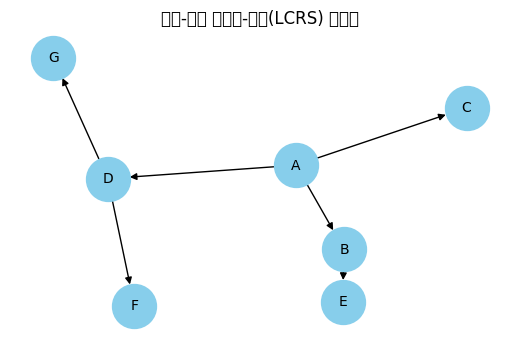

In [3]:
# LCRS(시각화)
import networkx as nx
import matplotlib.pyplot as plt

# 올바른 트리 시각화를 위한 간선 생성 함수
def build_graph_lcrs(parent, G):
    if parent is None:
        return

    child = parent.left
    while child:
        # 부모 → 자식 간선만 추가
        G.add_edge(parent.data, child.data)
        build_graph_lcrs(child, G)  # 자식의 자식 탐색
        child = child.right  # 다음 형제 탐색

# 트리 구조 시각화
G = nx.DiGraph()
build_graph_lcrs(A, G)

try:
    from networkx.drawing.nx_agraph import graphviz_layout
    pos = graphviz_layout(G, prog='dot')  # dot = 트리형
except:
    pos = nx.spring_layout(G)

# 시각화 출력
plt.figure(figsize=(5, 3))
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10)
plt.title("왼쪽-자식 오른쪽-형제(LCRS) 시각화")
plt.show()




---



### [실습] 트리 구현하기
- 트리를 클래스로 구현하기(N-링크 표현 방법)
- 전체 노드의 수 출력
- 트리의 높이(노드 기준) 출력
- 트리의 높이(간선 기준) 출력
- 트리의 차수
- 루트 노드 노드 출력
- J의 부모 노드 출력
- G의 형제 노드 출력
- C의 차수

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# N-링크 방식 트리 노드 정의
class TreeNode:
    def __init__(self, data):
        self.data = data
        self.children = []

    def add_child(self, child_node):
        self.children.append(child_node)

    def __repr__(self):
        return f"TreeNode({self.data})"


# --- 트리 구성 ---
# 노드 생성
nodes = {ch: TreeNode(ch) for ch in "ABCDEFGHIJKL"}

# 트리 구조 구성
nodes['A'].add_child(nodes['B'])
nodes['A'].add_child(nodes['C'])
nodes['A'].add_child(nodes['D'])

nodes['B'].add_child(nodes['E'])
nodes['B'].add_child(nodes['F'])
nodes['B'].add_child(nodes['G'])

nodes['C'].add_child(nodes['H'])
nodes['C'].add_child(nodes['I'])

nodes['D'].add_child(nodes['J'])

nodes['J'].add_child(nodes['K'])
nodes['J'].add_child(nodes['L'])

root = nodes['A']


In [ ]:
# 전체 노드 수
def count_nodes(node):
    if not node:
        return 0
    return 1 + sum(count_nodes(child) for child in node.children)

print("2) 전체 노드 수:", count_nodes(root))

In [ ]:
def count_nodes_iter(node):
    if not node:
        return 0

    count = 0
    stack = [node]
    while stack:
        current = stack.pop()
        count += 1
        # 자식들을 스택에 추가
        for child in current.children:
            stack.append(child)

    return count

print("2) 전체 노드 수:", count_nodes_iter(root))

In [ ]:
# 트리 높이 (노드 기준)
def get_height(node):
    if not node.children:
        return 1
    return 1 + max(get_height(child) for child in node.children)

# 트리 높이 (간선 기준)
def get_height_edges(node):
    if not node.children:
        return 0
    return 1 + max(get_height_edges(child) for child in node.children)

print("3) 트리 높이 (노드 기준):", get_height(root))
print("3) 트리 높이 (간선 기준):", get_height_edges(root))

In [ ]:
# 루트 노드
print("4) 루트 노드:", root.data)

In [ ]:
# 부모 노드 찾기
def find_parent(current, target):
    for child in current.children:
        if child == target:
            return current
        result = find_parent(child, target)
        if result:
            return result
    return None

print("5) J의 부모 노드:", find_parent(root, nodes['J']).data)

In [ ]:
# 형제 노드 찾기
def find_siblings(root, target):
    parent = find_parent(root, target)
    if parent:
        return [child.data for child in parent.children if child != target]
    return []

print("6) G의 형제 노드:", find_siblings(root, nodes['G']))

In [ ]:
# 트리 차수 (최대 자식 수)
def get_max_degree(node):
    if not node:
        return 0
    child_degrees = [get_max_degree(child) for child in node.children]
    # print(f"node[{node}], child_degrees={child_degrees}")
    return max([len(node.children)] + child_degrees)

# 노드 차수
def get_degree(node):
    return len(node.children)

print("7) 트리의 차수 (최대 자식 수):", get_max_degree(root))
print("8) C의 차수:", get_degree(nodes['C']))

In [ ]:
# 트리 시각화
def build_graph(node, G):
    for child in node.children:
        G.add_edge(node.data, child.data)
        build_graph(child, G)

G = nx.DiGraph()
build_graph(root, G)

try:
    from networkx.drawing.nx_agraph import graphviz_layout
    pos = graphviz_layout(G, prog='dot')
except:
    pos = nx.spring_layout(G)

plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=12)
plt.title("N-링크 트리 구조 시각화")
plt.show()



---



## 1-2. 이진 트리(Binary Tree)
- 레벨이나 노드의 개수를 바탕으로 종류 구분
- 트리를 구성할 때 left, right 설정.
- 경사이진트리: 한 쪽으로만 치우쳐진 트리
- 포화이진트리: 각 레벨에 모든 노드가 이진형태로 꽉 차있는 트리
- 완전이진트리: 마지막 레벨을 제오한 모든 레벨에서 모든 노드가 꽉 차 있음.
- 균형이진트리: 서브트리, 높이 차이 이용

### 1) 이진 트리 표현 : 링크 표현법
- 일반적으로 가장 많이 사용
- left와 right

In [ ]:
# 이진트리를 위한 노드 클래스
class BinaryTreeNode:
    def __init__ (self, data, left=None, right=None):   #(노드명, 왼쪽 노드명, 오른쪽 노드명)
        self.data = data
        self.left = left        # 왼쪽 자식을 위한 링크
        self.right = right      # 오른쪽 자식을 위한 링크

    def isLeaf(self):
        return self.left is None and self.right is None

# --- 트리 구성 ---
# 노드 생성
A = BinaryTreeNode("A")
B = BinaryTreeNode("B")
C = BinaryTreeNode("C")
D = BinaryTreeNode("D")
E = BinaryTreeNode("E")
F = BinaryTreeNode("F")

# 트리 연결 (완전 이진 트리 구조)
A.left = B
A.right= C
B.left = D
B.right= E
C.left = F

### [실습] 이진 트리 구현하기

In [ ]:
# 이진트리를 위한 노드 클래스
class BinaryTreeNode:
    def __init__ (self, data, left=None, right=None):   #(노드명, 왼쪽 노드명, 오른쪽 노드명)
        self.data = data
        self.left = left        # 왼쪽 자식을 위한 링크
        self.right = right      # 오른쪽 자식을 위한 링크

    def isLeaf(self):
        return self.left is None and self.right is None

# 노드 생성
A = BinaryTreeNode("A")
B = BinaryTreeNode("B")
C = BinaryTreeNode("C")
D = BinaryTreeNode("D")
E = BinaryTreeNode("E")
F = BinaryTreeNode("F")
G = BinaryTreeNode("G")

# 트리 연결 (완전 이진 트리 구조)
A.left = B
A.right= C
B.left = D
C.left = E
D.left = F
D.right= G

In [ ]:
# 전체 노드 수
def count_nodes(node):
    if not node:
        return 0
    return 1 + count_nodes(node.left) + count_nodes(node.right)

# 트리 높이 (노드 기준)
def get_height(node):
    if not node:
        return 0
    return 1 + max(get_height(node.left), get_height(node.right))

# 트리 높이 (간선 기준)
def get_height_edges(node):
    if not node:
        return -1  # 노드 없음 ⇒ 간선 없음
    return 1 + max(get_height_edges(node.left), get_height_edges(node.right))

# 부모 노드 찾기
def find_parent(current, target):
    if not current:
        return None
    if current.left == target or current.right == target:
        return current
    left_result = find_parent(current.left, target)
    if left_result:
        return left_result
    return find_parent(current.right, target)

# 형제 노드 찾기
def find_siblings(root, target):
    parent = find_parent(root, target)
    if parent:
        if parent.left == target and parent.right:
            return [parent.right.data]
        elif parent.right == target and parent.left:
            return [parent.left.data]
    return []

# 트리의 차수 (최대 자식 수: 0, 1, 2 중 최댓값)
def get_max_degree(node):
    if not node:
        return 0
    degree = int(node.left is not None) + int(node.right is not None)
    return max(degree, get_max_degree(node.left), get_max_degree(node.right))

# 특정 노드의 차수
def get_degree(node):
    if not node:
        return 0
    return int(node.left is not None) + int(node.right is not None)



print("1) 전체 노드 수:", count_nodes(A))
print("2) 트리 높이 (노드 기준):", get_height(A))
print("3) 트리 높이 (간선 기준):", get_height_edges(A))
print("4) 루트 노드:", A.data)
print("5) D의 부모 노드:", find_parent(A, D).data)
print("6) D의 형제 노드:", find_siblings(A, D))
print("7) 트리의 차수 (최대 자식 수):", get_max_degree(A))
print("8) C의 차수:", get_degree(C))

In [ ]:
# --- 트리 시각화 함수 ---
def build_graph(graph, node):
    if node is None:
        return
    if node.left:
        graph.add_edge(node.data, node.left.data)
        build_graph(graph, node.left)
    if node.right:
        graph.add_edge(node.data, node.right.data)
        build_graph(graph, node.right)

def visualize_binary_tree(root):
    G = nx.DiGraph()
    build_graph(G, root)

    try:
        from networkx.drawing.nx_agraph import graphviz_layout
        pos = graphviz_layout(G, prog='dot')  # 트리 구조로 배치
    except ImportError:
        pos = nx.spring_layout(G)  # 대체 레이아웃

    plt.figure(figsize=(5, 3))
    nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=10)
    plt.title("이진 트리", fontsize=12)
    plt.show()


# --- 실행 ---
visualize_binary_tree(A)    # root 노드를 인자로 넘긴다.

----

## 1-3. 트리 순회(Tree Traversal)

- 모든 노드를 한 번씩 탐색
- insert와 search는 같은 방식 동일
- 깊이우선탐색(전위, 중위, 후위) vs 넓이우선탐색(레벨)
- **트리 남색 알고리즘 알기 !!중요!!**

### 1) 전위, 중위, 후위 순회
- 깊이우선탐색(DFS, Depth-First-Search)
- 재귀나 스택 사용
- 전위 순회 (Preorder)  : Root → Left → Right (VLR)
- 중위 순회 (Inorder)     : Left → Root → Right (LVR)
- 후위 순회 (Postorder): Left → Right → Root (LRV

In [ ]:
# 이진트리의 전위순회
def preorder(n) :
    if n is not None :
        # print('(', end=' ')     # 중첩된 괄호 표현을 위한 출력
        print(n.data, end=' ')
        preorder(n.left)
        preorder(n.right)
        # print(')', end=' ')     # 중첩된 괄호 표현을 위한 출력

# 이진트리의 중위 순회
def inorder(n) :
    if n is not None :
        inorder(n.left)
        print(n.data, end=' ')
        inorder(n.right)

# 이진트리의 후위 순회
def postorder(n) :
    if n is not None :
        postorder(n.left)
        postorder(n.right)
        print(n.data, end=' ')

### 2) 레벨 순회
- 너비우선탐색(BFS, Breadth-First-Search)
- 레벨 순서대로 위에서 아래, 왼쪽에서 오른쪽(루트에서 가까운 노드부터 넓게 탐색)
- 큐(Queue) 사용

In [ ]:
# 1.(원형 큐) : 클래스 정의 와 생성자
class ArrayQueue:
    def __init__(self, capacity=10):
        self.capacity = capacity
        self.array = [None] * capacity
        self.front = 0
        self.rear = 0

    # 2.(원형 큐) : 공백 상태와 포화 상태 검사
    def isEmpty(self):
        return self.front == self.rear

    def isFull(self):
        return self.front == (self.rear+1)%self.capacity

    # 3.(원형 큐) : 삽입 연산
    def enqueue(self, item):
        if not self.isFull():
            self.rear = (self.rear+1)%self.capacity # 후단 회전
            self.array[self.rear] = item
        else:
            print('stack overflow!')
            pass

    # 4.(원형 큐) : 삭제 연산
    def dequeue(self):
        if not self.isEmpty():
            self.front = (self.front+1)%self.capacity  # 전단 회전
            return self.array[self.front]

    # 5. (원형 큐) : 상단 참조 연산
    def peek(self):
        if not self.isEmpty():
            return self.array[(self.front+1)%self.capacity]
        else: pass

    # 6. (원형 큐) : 전체 요소 수
    def size(self):
        return (self.rear - self.front + self.capacity) % self.capacity

    # 7. (원형 큐) : 전체 요소 화면에 출력
    def display(self, msg='Queue: '):
        print(msg, end='=[')
        count = self.size()
        for i in range(count):
            print(self.array[(self.front+1+i)%self.capacity], end=' ')
        print("]")

In [ ]:
# 레벨 순회
def levelorder(root):
    if not root:
        return
    queue = ArrayQueue()
    queue.enqueue(root)
    while not queue.isEmpty() :
        n = queue.dequeue()
        if n is not None :
            print(n.data, end=' ')
            queue.enqueue(n.left)
            queue.enqueue(n.right)


### [실습] 이진 트리 순회하기
- 전위 순회(preorder) 결과를 출력
- 중위 순회(inorder) 결과를 출력
- 후위 순회(postorder) 결과를 출력
- 레벨 순회(level-order) 결과를 출력

In [ ]:
# 이진트리를 위한 노드 클래스
class BinaryTreeNode:
    def __init__ (self, data, left=None, right=None):   #(노드명, 왼쪽 노드명, 오른쪽 노드명)
        self.data = data
        self.left = left        # 왼쪽 자식을 위한 링크
        self.right = right      # 오른쪽 자식을 위한 링크

    def isLeaf(self):
        return self.left is None and self.right is None

# 노드 생성
A = BinaryTreeNode("A")
B = BinaryTreeNode("B")
C = BinaryTreeNode("C")
D = BinaryTreeNode("D")
E = BinaryTreeNode("E")
F = BinaryTreeNode("F")
G = BinaryTreeNode("G")

# 트리 연결 (완전 이진 트리 구조)
A.left = B
A.right= C
B.left = D
C.left = E
D.left = F
D.right= G


# 1.전위 순회 결과를 출력하세요.
print('1.  Pre-Order : ', end=''); preorder(A)
print()
# 2.중위 순회 결과를 출력하세요
print('2.   In-Order : ', end=''); inorder(A)
print()
# 3.후위 순회 결과를 출력하세요
print('3. Post-Order : ', end=''); postorder(A)
print()
# 4.레벨 순회 결과를 출력하세요.
print('4.Level-Order : ', end=''); levelorder(A)
print()



---



## 1-4. [트리 응용] 수식 트리

- 수식 트리(Expression Tree)
    - 산술식을 트리 형태로 표현한 이진 트리
    - 수식 트리는 하나의 연산자가 두 개의 피연산자를 갖는다고 가정
    - **!!중요!! 시험출제**

- 

### [참고] Shunting Yard Algorithm
- 중위 표현식(infix)을 후위 표현식(postfix)으로 변환
- 스택에서 정렬하고 꺼내는 방식이 마치 철도 차량을 분기해서 정렬하는 작업과 비슷해서
다익스트라가 ‘Shunting Yard’라고 이름 붙임
- 계산 방식과 반대 순서로 트리 구조를 생성한다.

In [ ]:
import re

def tokenize(expression):
    # 정규식으로 숫자, 연산자, 괄호 분리
    return re.findall(r'\d+|[A-Za-z]+|[+\-*/^()]', expression)


def infix_to_postfix(expression):
    precedence = {'+': 1,
                  '-': 1,
                  '*': 2,
                  '/': 2}
    output = []
    stack = []

    tokens = tokenize(expression)

    for token in tokens:
        if token.isalnum():  # 피연산자
            output.append(token)
        elif token == '(':
            stack.append(token)
        elif token == ')':
            while stack and stack[-1] != '(':
                output.append(stack.pop())
            if stack and stack[-1] == '(':
                stack.pop()
        else:  # 연산자
            while (stack and stack[-1] != '(' and
                   precedence.get(token, 0) <= precedence.get(stack[-1], 0)):
                output.append(stack.pop())
            stack.append(token)

    while stack:
        output.append(stack.pop())

    return ' '.join(output)



In [ ]:
# 예제 1
expr1 = "A + B * C"
print("✅ 중위:", expr1)
print("🔁 후위:", infix_to_postfix(expr1))  # A B C * +
print()

# 예제 2
expr2 = "( A + B ) * ( C - D )"
print("✅ 중위:", expr2)
print("🔁 후위:", infix_to_postfix(expr2))  # A B + C D - *
print()

# 예제 3
expr3 = "A * ( B + C ) / D"
print("✅ 중위:", expr3)
print("🔁 후위:", infix_to_postfix(expr3))  # A B C + * D /
print()


expr1 = "(1 + 3) * ( 4 / 2)"
print("✅ 중위:", expr1)
print("🔁 후위:", infix_to_postfix(expr1))  # A B C * +
print()

### 1) 수식 트리의 계산
**앞에서 만든 이진 트리BinaryTreeNode 클래스와 연산 그대로 사용한다.**

In [ ]:
# 이진트리를 위한 노드 클래스
class BinaryTreeNode:
    def __init__ (self, data, left=None, right=None):   #(노드명, 왼쪽 노드명, 오른쪽 노드명)
        self.data = data
        self.left = left        # 왼쪽 자식을 위한 링크
        self.right = right      # 오른쪽 자식을 위한 링크

    def isLeaf(self):
        return self.left is None and self.right is None

In [ ]:
# 수식트리 계산 함수
def evaluate(node) :
    if node is None :                 # 공백 트리면 0 반환
       return 0
    elif node.isLeaf() :              # 단말 노드이면 --> 피연산자
       return node.data               # 그 노드의 값(데이터) 반환
    else :                            # 루트나 가지노드라면 --> 연산자
        op1 = evaluate(node.left)     # 왼쪽 서브트리 먼저 계산
        op2 = evaluate(node.right)    # 오른쪽 서브트리 먼저 계산
        if node.data == '+' : return op1 + op2
        elif node.data == '-' : return op1 - op2
        elif node.data == '*' : return op1 * op2
        elif node.data == '/' : return op1 / op2


### 2) 수식 트리 만들기

In [ ]:
# 후위표기 수식을 이용한 수식트리 만들기
def buildETree( expr ):
    if len(expr) == 0 :
        return None

    token = expr.pop()
    if token in "+-*/" :
        node = BinaryTreeNode(token)
        node.right= buildETree(expr)
        node.left = buildETree(expr)
        return node
    else :
        return BinaryTreeNode(float(token))


In [ ]:
# 전위표기 수식을 이용해 수식트리를 만들고 루트를 반환함
def buildETree2( expr ):
    if len(expr) == 0 :
        return None

    token = expr.pop(0)
    if token in "+-*/" :
        node = BinaryTreeNode(token)
        node.left = buildETree2(expr)
        node.right= buildETree2(expr)
        return node
    else :
        return BinaryTreeNode(float(token))


### [실습] 수식 트리 테스트

In [ ]:
#------ 테스트 프로그램----
# ex:   (1 + 3) * ( 4 / 2)
#       (100 - 50 * 2 / 4)

expr_infix   = input("입력(중위표기 수식): ")    # 중위표기식 입력
expr_postfix = infix_to_postfix(expr_infix)
print("✅ 중위:", expr_infix)
print("🔁 후위:", expr_postfix)


# 토큰 분리
expr = expr_postfix.split()			        # 토큰 리스트로 변환
print()

# # 후위표기 --> 수식트리
root = buildETree(expr)			    # 후위표기 --> 수식트리
print('\n❌ 전위 순회: ', end=''); preorder(root)
print('\n🔁 중위 순회: ', end=''); inorder(root)
print('\n🔁 후위 순회: ', end=''); postorder(root)
print('\n✅ 계산 결과 : ', evaluate(root))	# 수식트리 계산




---



## 1-5. 이진 탐색 트리(BST, Binary Search Tree)

- BST는 "탐색(search)"에 특화된 이진 트리로, 각 노드가 다음 조건을 만족해야 함.
    - **왼쪽** 서브트리: **현재 노드보다 작은 값들**
    - **오른쪽** 서브트리: **현재 노드보다 큰 값들**
    - 이 구조는 모든 서브트리에 도 동일하게 적용
- 이 구조 덕분에 탐색, 삽입, 삭제 연산이 빠름
- 중위 순회(Inorder)를 통해 트리의 모든 요소를 오름차순으로 출력할 수 있다.
- 최선/최악 시간 복잡도: O(log⁡𝑛) / O(𝑛)


### 1) BST 동작방식(연산)

In [ ]:
class BSTNode:
    def __init__(self, key):
        self.key = key
        self.left = None    # key보다 작은 값
        self.right = None   # key보다 큰 값

class BinarySearchTree:
    def __init__(self):
        self.root = None

    # 1. insert
    def insert(self, root, key):
        if root is None:
            return BSTNode(key)
        if key < root.key:
            root.left = self.insert(root.left, key)
        elif key > root.key:
            root.right = self.insert(root.right, key)
        # 중복은 삽입하지 않음
        return root

    # 2. search
    def search(self, root, key):
        if root is None or root.key == key:
            return root
        if key < root.key:
            return self.search(root.left, key)
        else:
            return self.search(root.right, key)

    # 3. delete
    def delete(self, root, key):
        if root is None:
            return None

        if key < root.key:
            root.left = self.delete(root.left, key)
        elif key > root.key:
            root.right = self.delete(root.right, key)
        else:
            # 삭제할 노드 발견
            # (1) 자식 없음
            if root.left is None and root.right is None:
                return None
            # (2) 왼쪽 없음
            elif root.left is None:
                return root.right
            # (2) 오른쪽 없음
            elif root.right is None:
                return root.left
            # (3) 두 자식 모두 있음
            else:
                # 오른쪽 서브트리에서 최소값 찾아 교체
                min_node = self._find_min(root.right)
                root.key = min_node.key
                root.right = self.delete(root.right, min_node.key)
        return root

    def _find_min(self, node):
        while node.left:
            node = node.left
        return node

    # 4. display (중위 순회)
    def display(self, root):
        print("BST 중위 순회 출력:")
        self._inorder(root)
        print()

    def _inorder(self, node):
        if node:
            self._inorder(node.left)
            print(node.key, end=" ")
            self._inorder(node.right)


In [ ]:
# ------ 테스트 ---------
bst = BinarySearchTree()
root = None

# 삽입
for value in [50, 30, 70, 20, 40, 60, 80]:
    root = bst.insert(root, value)

# 출력
bst.display(root)

# 탐색
target = 60
node = bst.search(root, target)
print(f"{target} 찾음:", node.key if node else f"{target} 없음")

# 삭제
root = bst.delete(root, 30)

# 출력
bst.display(root)

### @테스트 데이터 정의

In [ ]:
import numpy as np

# 1.숫자 데이터: 균등 정렬
arr = list(range(0, 1001, 10))  # 0, 10, ..., 1000
target = 420

# 2.NumPy 배열 데이터: 균등 정렬
arr_np = np.arange(-100, 100, 10)  # array([-100, -90, ..., 90])
target_np = -60

# 3.영어 단어 데이터: 사전순 정렬
english_words = sorted([
    "apple", "banana", "cherry", "date", "fig", "grape",
    "kiwi", "lemon", "mango", "orange", "peach", "plum", "quince"
])
target_english = "lemon"

# 4.한글 단어 데이터: 초성순 정렬
korean_words = sorted([
    "가방", "나무", "다리", "라디오", "마을", "바다", "사과",
    "아침", "자전거", "차례", "카메라", "타자기", "파도", "하늘"
])
target_korean = "자전거"

- [테스트용] 이름, 전화번호부 txt 읽어오기

In [ ]:
# 5.이름, 전화번호부 데이터:
class Contact:
    def __init__(self, name, phone):
        self.name = name
        self.phone = phone

    def __lt__(self, other):
        return self.name < other.name

    def __gt__(self, other):
        return self.name > other.name

    def __eq__(self, other):
        return self.name == other.name

    def __repr__(self):
        return f"{self.name}({self.phone})"

# 1.임의의 전화번호부 리스트 만들기
# contacts = [
#     Contact("김예림", "010-1234-5678"),
#     Contact("윤정우", "010-8015-7511"),
# ]

# 2.임의로 생성한 전화번호부 파일 읽어와서 리스트 만들기
file = './contacts_1000.txt'
contacts = []
with open(file, "r", encoding="utf-8") as f:
    for line in f:
        name, phone = line.strip().split(",")
        contacts.append(Contact(name, phone))

# 예시 출력 (처음 3개)
for c in contacts[:3]:
    print(c)

target_contact = Contact("윤정우", "010-8015-7511")  # 전화번호는 비교에 필요 없음


### @트리 탐색 테스트

In [ ]:
import time

def test_bst(TreeClass, data, target, label="데이터", sort_show=False):
    '''
    TreeClass   : BinarySearchTree 클래스명
    data        : 삽입할 데이터 (list or np.ndarray)
    target      : 검색 대상
    label       : 출력용 라벨
    sort_show   : 데이터 출력 여부
    '''
    bst = TreeClass()           # 트리 객체 생성
    root = None

    # 데이터 복사 후 삽입
    insert_data = np.copy(data) if isinstance(data, np.ndarray) else list(data)
    for item in insert_data:
        root = bst.insert(root, item)

    # 탐색 실행 : 탐색 성능 측정
    start = time.time()
    result = bst.search(root, target)
    end = time.time()

    # 기대값 판단
    if isinstance(data, np.ndarray):
        expected = np.where(data == target)[0] if target in data else -1
    else:
        expected = data.index(target) if target in data else -1

    # 결과 비교
    found = result is not None
    passed = found if expected != -1 else not found

    print(f"[{TreeClass.__name__}] {label}에서 🔍'{target}' 탐색: {'✅ PASS' if passed else '❌ FAIL'} ⏱️ {end - start:.6f} sec")

    if not passed:
        print("Expected:", 'Found' if expected != -1 else 'Not Found')
        print("Got     :", 'Found' if found else 'Not Found')

    if sort_show:
        print(f" data = {list(data)}")
        print(f"⏱️ Search Time: {end - start:.6f} sec\n")


# 테스트 실행
test_bst(BinarySearchTree, arr, target, "① 숫자 데이터")
test_bst(BinarySearchTree, arr_np, target_np, "② Numpy 음수 데이터")
test_bst(BinarySearchTree, english_words, target_english, "③ 영어 단어 데이터")
test_bst(BinarySearchTree, korean_words, target_korean, "④ 한글 단어 데이터")
test_bst(BinarySearchTree, contacts, target_contact, "⑤ 전화번호부 데이터")


### @ 다른 이진 트리 알고리즘과 비교 테스트

- **AVLTree 클래스** (자기균형 BST)
    -  세계 최초의 균형 이진 탐색 트리로, 1962년 G.M. Adelson-Velsky와 E.M. Landis가 제안한 구조 (AVL은 이름에서 따온 것)
    - 🔸 균형 조건 (Balance Factor)
        - 각 노드의 왼쪽 서브트리 높이 - 오른쪽 서브트리 높이가 -1, 0, +1 중 하나여야 함
        - 이 조건을 벗어나면, 회전(rotation) 연산을 통해 다시 균형을 맞춤

In [ ]:
class AVLNode:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.height = 1

class AVLTree:
    def insert(self, root, key):
        if not root:
            return AVLNode(key)
        if key < root.key:
            root.left = self.insert(root.left, key)
        elif key > root.key:
            root.right = self.insert(root.right, key)
        else:
            return root  # 중복 키는 삽입 안 함

        # 높이 업데이트
        root.height = 1 + max(self._get_height(root.left), self._get_height(root.right))

        # 균형 계수 계산
        balance = self._get_balance(root)

        # 회전 케이스
        # LL
        if balance > 1 and key < root.left.key:
            return self._right_rotate(root)
        # RR
        if balance < -1 and key > root.right.key:
            return self._left_rotate(root)
        # LR
        if balance > 1 and key > root.left.key:
            root.left = self._left_rotate(root.left)
            return self._right_rotate(root)
        # RL
        if balance < -1 and key < root.right.key:
            root.right = self._right_rotate(root.right)
            return self._left_rotate(root)

        return root

    def search(self, root, key):
        if not root or root.key == key:
            return root
        if key < root.key:
            return self.search(root.left, key)
        else:
            return self.search(root.right, key)

    def _get_height(self, node):
        return node.height if node else 0

    def _get_balance(self, node):
        return self._get_height(node.left) - self._get_height(node.right) if node else 0

    def _left_rotate(self, z):
        y = z.right
        T2 = y.left
        y.left = z
        z.right = T2

        z.height = 1 + max(self._get_height(z.left), self._get_height(z.right))
        y.height = 1 + max(self._get_height(y.left), self._get_height(y.right))
        return y

    def _right_rotate(self, z):
        y = z.left
        T3 = y.right
        y.right = z
        z.left = T3

        z.height = 1 + max(self._get_height(z.left), self._get_height(z.right))
        y.height = 1 + max(self._get_height(y.left), self._get_height(y.right))
        return y


- **RedBlackTree** 클래스 (균형 BST – 색상 기반)
    - 이진 탐색 트리의 일종, 노드에 색깔(Red 또는 Black)을 부여하고, 일정한 규칙을 통해 트리의 균형을 유지
    - 삽입과 삭제 시에도 최대 트리 높이를 log n 이하로 유지
    - 🔸 레드-블랙 트리의 성질 (불변 조건)
        - 노드는 빨강 또는 검정이다.
        - 루트는 항상 검정이다.
        - 모든 리프 노드(NIL, NULL 노드)는 검정이다.
        - 빨강 노드의 자식은 항상 검정 (빨강은 연속으로 올 수 없다)
        - 어떤 노드에서 리프까지 가는 모든 경로에 있는 검정 노드의 수는 같다

In [ ]:
class RBNode:
    def __init__(self, key, color='RED'):
        self.key = key
        self.left = None
        self.right = None
        self.color = color

class RedBlackTree:
    def __init__(self):
        self.RED = 'RED'
        self.BLACK = 'BLACK'

    def insert(self, root, key):
        root = self._insert(root, key)
        root.color = self.BLACK  # 루트는 항상 BLACK
        return root

    def _insert(self, node, key):
        if node is None:
            return RBNode(key)

        if key < node.key:
            node.left = self._insert(node.left, key)
        elif key > node.key:
            node.right = self._insert(node.right, key)
        else:
            return node  # 중복 X

        # 좌-우 빨강 정렬/균형 조정 (simplified version)
        if self._is_red(node.right) and not self._is_red(node.left):
            node = self._rotate_left(node)
        if self._is_red(node.left) and self._is_red(node.left.left):
            node = self._rotate_right(node)
        if self._is_red(node.left) and self._is_red(node.right):
            self._flip_colors(node)

        return node

    def search(self, root, key):
        current = root
        while current:
            if key == current.key:
                return current
            elif key < current.key:
                current = current.left
            else:
                current = current.right
        return None

    def _is_red(self, node):
        return node is not None and node.color == self.RED

    def _rotate_left(self, h):
        x = h.right
        h.right = x.left
        x.left = h
        x.color = h.color
        h.color = self.RED
        return x

    def _rotate_right(self, h):
        x = h.left
        h.left = x.right
        x.right = h
        x.color = h.color
        h.color = self.RED
        return x

    def _flip_colors(self, node):
        node.color = self.RED
        node.left.color = self.BLACK
        node.right.color = self.BLACK


In [ ]:
# 테스트 실행
test_bst(BinarySearchTree, arr, target, "① 숫자 데이터")
test_bst(AVLTree, arr, target, "① 숫자 데이터")
test_bst(RedBlackTree, arr, target, "① 숫자 데이터")
print()
test_bst(BinarySearchTree, arr_np, target_np, "② Numpy 음수 데이터")
test_bst(AVLTree, arr_np, target_np, "② Numpy 음수 데이터")
test_bst(RedBlackTree, arr_np, target_np, "② Numpy 음수 데이터")
print()
test_bst(BinarySearchTree, english_words, target_english, "③ 영어 단어 데이터")
test_bst(AVLTree, english_words, target_english, "③ 영어 단어 데이터")
test_bst(RedBlackTree, english_words, target_english, "③ 영어 단어 데이터")
print()
test_bst(BinarySearchTree, korean_words, target_korean, "④ 한글 단어 데이터")
test_bst(AVLTree, korean_words, target_korean, "④ 한글 단어 데이터")
test_bst(RedBlackTree, korean_words, target_korean, "④ 한글 단어 데이터")
print()
test_bst(BinarySearchTree, contacts, target_contact, "⑤ 전화번호부 데이터")
test_bst(AVLTree, contacts, target_contact, "⑤ 전화번호부 데이터")
test_bst(RedBlackTree, contacts, target_contact, "⑤ 전화번호부 데이터")



---



# 2.그래프 탐색

## 2-1. 깊이 우선 탐색(DFS:Depth-First Search)
- 가능한 모든 경로를 탐색하면서 미로의 출구까지 이동 (보통 우수법 알고리즘으로 사용)
- 재귀 방법 or 스택을 이용한 방법

In [ ]:
# 재귀 방법 사용
def dfs(maze, start, end, path=[]):
    # 현재 위치를 경로에 추가
    path = path + [start]

    # 현재 위치가 출구인지 확인
    if start == end:
        return path

    # 현재 위치에서 이동할 수 있는 모든 방향을 탐색
    row, col = start
    directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]  # 오른쪽, 왼쪽, 아래, 위
    for drow, dcol in directions:
        new_row, new_col = row + drow, col + dcol

        # 미로의 경계를 벗어나는지 확인
        if 0 <= new_row < len(maze) and 0 <= new_col < len(maze[0]) and maze[new_row][new_col] == 0:
            # 새로운 위치에서 DFS 재귀 호출
            if (new_row, new_col) not in path:  # 이미 방문한 위치인지 확인
                new_path = dfs(maze, (new_row, new_col), end, path)
                if new_path:
                    return new_path

    # 출구까지 도달하는 경로가 없는 경우
    return None

# 미로를 2D 리스트로 표현 (0은 통로, 1은 벽)
maze = [
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0],
    [1, 0, 1, 0, 0],
    [0, 0, 1, 0, 1],
    [0, 0, 0, 0, 0]
]

# 시작 위치와 끝 위치
start = (0, 0)
end = (4, 4)

# DFS 알고리즘을 사용하여 미로 탈출 경로 찾기
escape_path = dfs(maze, start, end)

if escape_path:
    print("미로 탈출 경로:", escape_path)
else:
    print("미로를 탈출할 수 없습니다.")

- Stack 이용

In [ ]:
# 스택 사용 방법
def dfs(maze, start, end):
    print('[bfs] 진행합니다.')
    rows, cols = len(maze), len(maze[0])
    stack = [start]
    visited = [[False] * cols for _ in range(rows)]
    visited[start[0]][start[1]] = True

    # 방향 벡터 (상, 하, 좌, 우)
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    while stack:
        current = stack.pop()
        print(f"현재 위치: {current}")

        # 현재 위치가 도착점인지 확인
        if current == end:
            print("도착했습니다!")
            return True

        # 가능한 모든 방향으로 이동
        for direction in directions:
            nr, nc = current[0] + direction[0], current[1] + direction[1]

            # 미로 범위 내에 있고, 벽이 아니며, 방문하지 않았던 경우
            if 0 <= nr < rows and 0 <= nc < cols and not maze[nr][nc] and not visited[nr][nc]:
                visited[nr][nc] = True
                stack.append((nr, nc))

    print("도착할 수 없습니다.")
    return False

## 2-2. 너비 우선 탐색(BFS:Breadth-First Search)
- 일반적으로 Queue 이용 (재귀 사용 안함--> 비효율적)
- BFS는 모든 가능한 경로를 동시에 탐색하면서 목표지점에 도달할 수 있는 최단 경로를 찾는데 효과적

In [ ]:
from collections import deque

def bfs(maze, start, end):
    print('[bfs] 진행합니다.')
    # 미로의 행과 열 크기
    rows, cols = len(maze), len(maze[0])

    # 방문 위치를 저장할 배열
    visited = [[False] * cols for _ in range(rows)]

    # 큐 초기화 및 시작점 추가
    queue = deque([start])
    visited[start[0]][start[1]] = True

    # 방향 벡터 (상, 하, 좌, 우)
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    while queue:
        current = queue.popleft()
        print(f"현재 위치: {current}")

        # 현재 위치가 도착점인지 확인
        if current == end:
            print("도착했습니다!")
            return True

        # 가능한 모든 방향으로 이동
        for direction in directions:
            nr, nc = current[0] + direction[0], current[1] + direction[1]

            # 미로 범위 내에 있고, 벽이 아니며, 방문하지 않았던 경우
            if 0 <= nr < rows and 0 <= nc < cols and not maze[nr][nc] and not visited[nr][nc]:
                visited[nr][nc] = True
                queue.append((nr, nc))

    print("도착할 수 없습니다.")
    return False

In [ ]:
# 미로 예시 (0은 길, 1은 벽)
maze = [
    [0, 1, 1, 1, 1],
    [0, 0, 0, 0, 1],
    [1, 1, 0, 1, 1],
    [1, 0, 0, 0, 0],
    [1, 1, 1, 1, 0]
]

start = (0, 0)  # 시작점
end = (4, 4)    # 도착점

bfs(maze, start, end)  # 깊이 우선 탐색
dfs(maze, start, end)  # 너비 우선 탐색

### [참고] DFS 탐색 알고리즘 그래프로 시각화

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (3,2)

def plot_maze(maze, visited, path=None):
    r, c = maze.shape
    image = np.zeros((r, c, 3))
    for i in range(r):
        for j in range(c):
            if maze[i, j] == 1:
                image[i, j] = [0, 0, 0]  # 벽은 검정색
            elif visited[i, j]:
                image[i, j] = [0, 1, 0]  # 방문한 곳은 녹색
            else:
                image[i, j] = [1, 1, 1]  # 길은 흰색

    if path:
        for (x, y) in path:
            image[x, y] = [1, 0, 0]  # 경로는 빨간색

    plt.imshow(image)
    plt.show()

def dfs(maze, start, end):
    r, c = maze.shape
    stack = [start]
    visited = np.zeros_like(maze, dtype=bool)
    visited[start] = True

    while stack:
        current = stack.pop()
        plot_maze(maze, visited)  # 현재 미로 상태를 그립니다.

        if current == end:
            print("도착했습니다!")
            return True

        for direction in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nr, nc = current[0] + direction[0], current[1] + direction[1]
            if 0 <= nr < r and 0 <= nc < c and not maze[nr, nc] and not visited[nr, nc]:
                visited[nr, nc] = True
                stack.append((nr, nc))

    print("도착할 수 없습니다.")
    return False

# 미로 예시
maze = np.array([
    [0, 1, 1, 1, 1],
    [0, 0, 0, 0, 1],
    [1, 1, 0, 1, 1],
    [1, 0, 0, 0, 0],
    [1, 1, 1, 1, 0]
])

start = (0, 0)  # 시작점
end = (4, 4)    # 도착점

dfs(maze, start, end)

### 3) A* 알고리즘

In [ ]:
import heapq

def heuristic(node, goal):
    # 휴리스틱 함수: 현재 노드에서 목표 노드까지의 추정 거리를 반환
    x1, y1 = node
    x2, y2 = goal
    return abs(x1 - x2) + abs(y1 - y2)  # 맨해튼 거리(Manhattan Distance) 사용

def astar(maze, start, end):
    # 시작 노드 생성
    open_list = []
    closed_list = set()
    heapq.heappush(open_list, (0, start, []))  # 우선순위 큐에 시작 노드 추가: (거리, 위치, 경로)

    while open_list:
        _, current, path = heapq.heappop(open_list)  # 우선순위 큐에서 가장 짧은 거리의 노드 추출
        if current == end:
            return path + [current]  # 목표에 도달한 경우 경로 반환

        closed_list.add(current)  # 현재 위치를 closed_list에 추가

        # 현재 위치에서 이동 가능한 모든 방향 탐색
        row, col = current
        directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]  # 오른쪽, 왼쪽, 아래, 위
        for drow, dcol in directions:
            new_row, new_col = row + drow, col + dcol

            # 미로의 경계를 벗어나는지 확인
            if 0 <= new_row < len(maze) and 0 <= new_col < len(maze[0]) and maze[new_row][new_col] == 0:
                new_node = (new_row, new_col)
                if new_node not in closed_list:
                    new_path = path + [current]  # 새로운 경로 생성
                    cost = len(new_path) + heuristic(new_node, end)  # 새로운 노드의 비용 계산
                    heapq.heappush(open_list, (cost, new_node, new_path))  # 우선순위 큐에 추가

    return None  # 목표에 도달할 수 없는 경우 None 반환

# 미로를 2D 리스트로 표현 (0은 통로, 1은 벽)
maze = [
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0],
    [1, 0, 1, 0, 0],
    [0, 0, 1, 0, 1],
    [0, 0, 0, 0, 0]
]

# 시작 위치와 끝 위치
start = (0, 0)
end = (4, 4)

# A* 알고리즘을 사용하여 미로 탈출 경로 찾기
escape_path = astar(maze, start, end)

if escape_path:
    print("미로 탈출 경로:", escape_path)
else:
    print("미로를 탈출할 수 없습니다.")